In [1]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [2]:
# Baseline JSRUN
exp1_sessions = pd.read_csv('../data/exp1/sessions.csv', index_col=0)
exp1_pilots = pd.read_csv('../data/exp1/pilots.csv', index_col=0)
exp1_units = pd.read_csv('../data/exp1/units.csv', index_col=0)

# Baseline PRRTE
exp2_sessions = pd.read_csv('../data/exp2/sessions.csv', index_col=0)
exp2_pilots = pd.read_csv('../data/exp2/pilots.csv', index_col=0)
exp2_units = pd.read_csv('../data/exp2/units.csv', index_col=0)

# Multi subagents PRRTE
exp3_sessions = pd.read_csv('../data/exp3/sessions.csv', index_col=0)
exp3_pilots = pd.read_csv('../data/exp3/pilots.csv', index_col=0)
exp3_units = pd.read_csv('../data/exp3/units.csv', index_col=0)

# Single subagent, ssh comm method, manually increased processes PRRTE
exp4_sessions = pd.read_csv('../data/exp4/sessions.csv', index_col=0)
exp4_pilots = pd.read_csv('../data/exp4/pilots.csv', index_col=0)
exp4_units = pd.read_csv('../data/exp4/units.csv', index_col=0)

In [3]:
# Cleanup Exp4 spurious runs
exp4_sessions.drop('rp.session.login4.mturilli1.018119.0002', axis=0, inplace=True)

In [4]:
print 'Experiment 1: Baseline: Total number of successful runs: %s' % exp1_sessions.shape[0]
print 'Experiment 1: Baseline: Total number of pilots: %s' % exp1_pilots.shape[0]
print 'Experiment 1: Baseline: Total number of units: %s\n' % exp1_units.shape[0]

print 'Experiment 2: Baseline: Total number of successful runs: %s' % exp2_sessions.shape[0]
print 'Experiment 2: Baseline: Total number of pilots: %s' % exp2_pilots.shape[0]
print 'Experiment 2: Baseline: Total number of units: %s\n' % exp2_units.shape[0]

print 'Experiment 3: Baseline: Total number of successful runs: %s' % exp3_sessions.shape[0]
print 'Experiment 3: Baseline: Total number of pilots: %s' % exp3_pilots.shape[0]
print 'Experiment 3: Baseline: Total number of units: %s\n' % exp3_units.shape[0]

print 'Experiment 4: Baseline: Total number of successful runs: %s' % exp4_sessions.shape[0]
print 'Experiment 4: Baseline: Total number of pilots: %s' % exp4_pilots.shape[0]
print 'Experiment 4: Baseline: Total number of units: %s\n' % exp4_units.shape[0]

Experiment 1: Baseline: Total number of successful runs: 26
Experiment 1: Baseline: Total number of pilots: 32
Experiment 1: Baseline: Total number of units: 5257

Experiment 2: Baseline: Total number of successful runs: 24
Experiment 2: Baseline: Total number of pilots: 24
Experiment 2: Baseline: Total number of units: 4095

Experiment 3: Baseline: Total number of successful runs: 5
Experiment 3: Baseline: Total number of pilots: 5
Experiment 3: Baseline: Total number of units: 7168

Experiment 4: Baseline: Total number of successful runs: 7
Experiment 4: Baseline: Total number of pilots: 8
Experiment 4: Baseline: Total number of units: 46080



In [5]:
exp1_sessions.loc[exp1_sessions.ncore == 84, 'ncore'] = 168
exp1_sessions['nnode'] = exp1_sessions.ncore/168
exp1_sessions['list'] = exp1_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp1_sessions['nunitnode'] = exp1_sessions['list'].apply('/'.join)

exp1_ws = exp1_sessions[['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
                         'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
                         'cu_exec_start_stop','nunit_failed']
                       ].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp1_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp1_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp1_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)
exp1_ws = exp1_ws.sort_values("nunit")
exp1_ws

TTQ              nunit_failed           TTC                Agent scheduling              TTX Unit            Agent queueing           Agent queueing execution             TTX Agent           
                        mean          std         mean          mean            std             mean       std        mean        std           mean       std                     mean       std        mean        std
nunit nunitnode                                                                                                                                                                                                         
1     1/1          59.459004    42.339110          0.0  1.562854e+09    5136.458185         0.003607  0.000579  900.547132   0.186629       0.000788  0.000076                 0.000792  0.000037  900.610458   0.160406
2     2/1          42.557972    12.833052          0.0  1.564014e+09  695273.555382         0.003448  0.000320  900.619918   0.454588       0.000911  0.000041                 0.007444  0.000146  900.696172   0.428455
4     4/1          65.701483    49.882463          0.0  1.563887e+09  978762.745899         0.007426  0.000476  900.377831   0.016287       0.001303  0.000098                 0.024567  0.000512  900.488166   0.005523
8     8/1          39.701245    10.621779          0.0  1.563890e+09  980892.543357         0.014557  0.000672  900.433873   0.000847       0.003250  0.000474                 0.064787  0.003609  900.476350   0.014292
16    16/1         31.662136     2.446324          0.0  1.563894e+09  984922.738598         0.028208  0.001826  900.627073   0.000387       0.003964  0.000599                 0.225481  0.044294  900.716311   0.001643
32    32/1         78.292810    57.091040          0.0  1.563894e+09  983094.153602         0.052822  0.000561  901.326492   0.617766       0.005668  0.000118                 0.449643  0.013136  901.414377   0.583922
64    64/2         53.687704    31.287596          0.0  1.563646e+09  234648.595533         0.106535  0.002742  901.308607   0.052904       0.011727  0.000096                 1.035330  0.068996  901.396330   0.095494
128   128/4       127.660921   131.673098          0.0  1.564237e+09  505081.313749         0.270433  0.008946  902.665787   0.405403       0.021218  0.000017                 2.024406  0.095112  902.753368   0.366134
256   256/7       113.375720   119.402988          0.0  1.564259e+09  507769.592928         0.715442  0.015333  905.102004   0.778279       0.041037  0.000412                 4.587034  0.575951  905.189366   0.763868
512   512/13       34.897546     2.431985          0.0  1.564270e+09  521495.909719         1.675351  0.139489  909.280210   0.430718       0.080364  0.000862                 9.005657  0.411434  909.350081   0.444054
1024  1024/25     617.458293   613.676073         57.5  1.563908e+09    7266.035433         4.112562  0.269654  936.334963   0.059782       0.155643  0.000663                16.287116  0.094822  936.441911   0.060744
2048  2048/49    4224.976741  5915.143289       1080.5  1.564357e+09  435693.312143        17.968268  0.010471  952.855749  21.058040       0.309970  0.000104                23.787571  1.224119  952.913288  21.051754

In [6]:
exp2_sessions.loc[exp2_sessions.ncore == 84, 'ncore'] = 168
exp2_sessions['nnode'] = exp2_sessions.ncore/168
exp2_sessions['list'] = exp2_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp2_sessions['nunitnode'] = exp2_sessions['list'].apply('/'.join)

exp2_ws = exp2_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp2_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp2_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp2_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

exp2_ws = exp2_ws.sort_values("nunit")
exp2_ws

TTQ              nunit_failed           TTC               Agent scheduling              TTX Unit           Agent queueing           Agent queueing execution             TTX Agent          
                        mean          std         mean          mean           std             mean       std        mean       std           mean       std                     mean       std        mean       std
nunit nunitnode                                                                                                                                                                                                      
1     1/1          43.968997    16.259856          0.0  1.564507e+09  98873.883631         0.002005  0.000018  900.182332  0.133985       0.000846  0.000076                 0.000731  0.000025  900.373097  0.142088
2     2/1          36.255364     2.680791          0.0  1.564521e+09  70597.280831         0.004200  0.000050  900.185613  0.003187       0.000927  0.000044                 0.111029  0.005562  900.349310  0.022910
4     4/1          33.362355     1.538903          0.0  1.564523e+09  66820.676286         0.008955  0.000778  900.404757  0.004772       0.001351  0.000120                 0.325567  0.002135  900.558405  0.015118
8     8/1         577.065725   737.370715          0.0  1.564518e+09  58891.057395         0.018128  0.000195  900.843271  0.006630       0.003399  0.000145                 0.764067  0.001406  901.057842  0.005352
16    16/1         53.538131    13.132927          0.0  1.564519e+09  51158.463340         0.034270  0.000401  901.775495  0.037882       0.003152  0.000063                 1.697455  0.036994  901.936941  0.042138
32    32/1        287.904916   354.159341          0.0  1.564523e+09  42546.180590         0.066873  0.000661  903.578035  0.096324       0.005958  0.000144                 3.497538  0.092924  903.762297  0.124624
64    64/2         50.253903    20.248927          0.0  1.564545e+09  66818.471443         0.132313  0.000650  907.122170  0.061795       0.011809  0.000202                 7.046248  0.058666  907.334008  0.050969
128   128/4       113.512645    69.663776          0.0  1.564546e+09  66880.540488         0.268213  0.001523  914.314947  0.150133       0.022310  0.000163                14.231669  0.141986  914.483081  0.180268
256   256/7        40.457664     6.086513          0.0  1.564560e+09  79726.061343         0.568507  0.014562  928.823017  0.249286       0.041228  0.000016                28.744293  0.258761  928.966843  0.244877
512   512/13     2173.352623  3021.885591          0.0  1.564573e+09  91216.790981         1.271925  0.049166  957.922123  0.396208       0.085318  0.008160                57.833149  0.386920  958.113472  0.405857
1024  1024/25     741.760829  1005.570175        254.0  1.564578e+09  89608.041980         2.726785  0.044331  987.176202  0.871434       0.156877  0.000486               115.597231  2.331131  987.374714  0.904861
2048  2048/49    2714.251405  3682.955637       1292.5  1.564586e+09  94439.734765        91.009773  1.666997  987.357174  2.545688       0.356409  0.050753               225.828357  5.270459  987.548610  2.515038

In [7]:
exp3_sessions.loc[exp3_sessions.ncore == 84, 'ncore'] = 168
exp3_sessions['nnode'] = exp3_sessions.ncore/168
exp3_sessions['list'] = exp3_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp3_sessions['nunitnode'] = exp3_sessions['list'].apply('/'.join)

exp3_ws = exp3_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp3_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp3_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp3_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

exp3_ws = exp3_ws.sort_values("nunit")
exp3_ws

TTQ              nunit_failed           TTC                Agent scheduling               TTX Unit           Agent queueing           Agent queueing execution              TTX Agent          
                        mean          std         mean          mean            std             mean       std         mean       std           mean       std                     mean       std         mean       std
nunit nunitnode                                                                                                                                                                                                         
1024  1024/27    1108.263783   936.641863            0  1.565224e+09  122662.007809         2.668188  0.129521   970.990249  3.218823       3.263131  0.160942                78.593396  5.231766   971.225939  3.265267
2048  2048/52    1411.159112  1949.625054            0  1.565357e+09   12428.849464       907.272305  0.101199  1802.367766  0.044271       7.473378  0.014579                98.093762  0.353518  1802.574850  0.066410

In [8]:
exp4_sessions.loc[exp4_sessions.ncore == 84, 'ncore'] = 168
exp4_sessions['nnode'] = exp4_sessions.ncore/168
exp4_sessions['nnode'] = exp4_sessions['nnode'].apply(np.ceil)
exp4_sessions['list'] = exp4_sessions[['nunit','nnode']].astype(int, errors='ignore').astype('str').values.tolist()
exp4_sessions['nunitnode'] = exp4_sessions['list'].apply('/'.join)

exp4_ws = exp4_sessions[
    ['nunit','nunitnode','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING',
     'U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING',
     'cu_exec_start_stop','nunit_failed']].groupby(['nunit','nunitnode']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std'],
                 'cu_exec_start_stop'  : ['mean','std'],
                 'nunit_failed'        : ['mean']
                })

exp4_ws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
exp4_ws.rename({'U_AGENT_EXECUTING'   :'TTX Agent'}, axis='columns', inplace=True)
exp4_ws.rename({'cu_exec_start_stop'  :'TTX Unit'}, axis='columns', inplace=True)

exp4_ws = exp4_ws.sort_values("nunit")
exp4_ws

TTQ              nunit_failed           TTC              Agent scheduling               TTX Unit           Agent queueing           Agent queueing execution              TTX Agent          
                        mean          std         mean          mean          std             mean       std         mean       std           mean       std                     mean       std         mean       std
nunit nunitnode                                                                                                                                                                                                       
1024  1024/26      60.712946          NaN            0  1.565612e+09          NaN         4.312267       NaN  1020.719525       NaN       8.794240       NaN               120.748415       NaN  1021.041061       NaN
2048  2048/51     575.378429          NaN            0  1.565572e+09          NaN        11.093097       NaN  1152.007564       NaN      20.968657       NaN               251.881001       NaN  1152.404476       NaN
4096  4096/100     75.451104     8.662274            0  1.565793e+09  2269.696472       903.072301  0.033538  1805.781297  0.006372      21.044760  0.019252               555.707601  1.640417  1805.976665  0.050061
8192  8192/202   1073.793338  1410.478176            0  1.565802e+09  5047.383338        58.958676  0.181679  2015.041753  0.903093      63.883618  0.104586              1114.864786  0.920683  2015.256482  0.889548
16384 16384/400  2841.168447          NaN            0  1.565813e+09          NaN       894.952998       NaN  3141.045078       NaN     212.183587       NaN              2240.746713       NaN  3141.246807       NaN

In [9]:
oh1 = exp1_ws[['TTX Agent','TTX Unit','nunit_failed']].copy(deep=True)
oh1.loc[:,('TTX Agent','mean')] = oh1.loc[:,('TTX Agent','mean')] - oh1.loc[:,('TTX Unit','mean')]
oh1.loc[:,('TTX Unit','mean')] = oh1.loc[:,('TTX Unit','mean')] - 900
oh1.loc[:,('nunit_failed','mean')] = oh1.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh1.rename({'TTX Agent': 'RP Overhead with JSRUN'}, axis='columns', inplace=True)
oh1.rename({'TTX Unit' : 'JSRUN Overhead'}, axis='columns', inplace=True)

oh1.columns = [' '.join(col).strip() for col in oh1.columns.values]

oh1 = oh1.sort_values("nunit")
oh1 = oh1.reset_index()

In [10]:
oh2 = exp2_ws[['TTX Agent','TTX Unit','nunit_failed']].copy(deep=True)
oh2.loc[:,('TTX Agent','mean')] = oh2.loc[:,('TTX Agent','mean')] - oh2.loc[:,('TTX Unit','mean')]
oh2.loc[:,('TTX Unit','mean')] = oh2.loc[:,('TTX Unit','mean')] - 900
oh2.loc[:,('nunit_failed','mean')] = oh2.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh2.rename({'TTX Agent': 'RP Overhead with PRRTE'}, axis='columns', inplace=True)
oh2.rename({'TTX Unit' : 'PRRTE Overhead'}, axis='columns', inplace=True)

oh2.columns = [' '.join(col).strip() for col in oh2.columns.values]

oh2 = oh2.sort_values("nunit")
oh2 = oh2.reset_index()

In [11]:
oh3 = exp3_ws[['TTX Agent','TTX Unit','nunit_failed']].copy(deep=True)
oh3.loc[:,('TTX Agent','mean')] = oh3.loc[:,('TTX Agent','mean')] - oh3.loc[:,('TTX Unit','mean')]
oh3.loc[:,('TTX Unit','mean')] = oh3.loc[:,('TTX Unit','mean')] - 900
oh3.loc[:,('nunit_failed','mean')] = oh3.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh3.rename({'TTX Agent': 'RP Overhead with PRRTE and subagents'}, axis='columns', inplace=True)
oh3.rename({'TTX Unit' : 'PRRTE Overhead subagents'}, axis='columns', inplace=True)

oh3.columns = [' '.join(col).strip() for col in oh3.columns.values]

oh3 = oh3.sort_values("nunit")
oh3 = oh3.reset_index()

In [12]:
oh4 = exp4_ws[['TTX Agent','TTX Unit','nunit_failed']].copy(deep=True)
oh4.loc[:,('TTX Agent','mean')] = oh4.loc[:,('TTX Agent','mean')] - oh4.loc[:,('TTX Unit','mean')]
oh4.loc[:,('TTX Unit','mean')] = oh4.loc[:,('TTX Unit','mean')] - 900
oh4.loc[:,('nunit_failed','mean')] = oh4.loc[:,('nunit_failed','mean')].apply(np.ceil)

oh4.rename({'TTX Agent': 'RP Overhead with PRRTE and subagent'}, axis='columns', inplace=True)
oh4.rename({'TTX Unit' : 'PRRTE Overhead subagent'}, axis='columns', inplace=True)

oh4.columns = [' '.join(col).strip() for col in oh4.columns.values]

oh4 = oh4.sort_values("nunit")
oh4 = oh4.reset_index()

In [13]:
oh = oh1.join(oh2[['RP Overhead with PRRTE mean',
                   'RP Overhead with PRRTE std',
                   'PRRTE Overhead mean',
                   'PRRTE Overhead std'
                  ]])
oh['PRRTE Wait'] = (oh['nunit']-oh['nunit_failed mean'])*0.1

oh

,nunit,nunitnode,RP Overhead with JSRUN mean,RP Overhead with JSRUN std,JSRUN Overhead mean,JSRUN Overhead std,nunit_failed mean,RP Overhead with PRRTE mean,RP Overhead with PRRTE std,PRRTE Overhead mean,PRRTE Overhead std,PRRTE Wait
0,1,1/1,0.063326,0.160406,0.547132,0.186629,0.0,0.190766,0.142088,0.182332,0.133985,0.1
1,2,2/1,0.076254,0.428455,0.619918,0.454588,0.0,0.163697,0.022910,0.185613,0.003187,0.2
2,4,4/1,0.110335,0.005523,0.377831,0.016287,0.0,0.153648,0.015118,0.404757,0.004772,0.4
3,8,8/1,0.042477,0.014292,0.433873,0.000847,0.0,0.214571,0.005352,0.843271,0.006630,0.8
4,16,16/1,0.089238,0.001643,0.627073,0.000387,0.0,0.161446,0.042138,1.775495,0.037882,1.6
5,32,32/1,0.087885,0.583922,1.326492,0.617766,0.0,0.184262,0.124624,3.578035,0.096324,3.2
6,64,64/2,0.087722,0.095494,1.308607,0.052904,0.0,0.211837,0.050969,7.122170,0.061795,6.4
7,128,128/4,0.087581,0.366134,2.665787,0.405403,0.0,0.168134,0.180268,14.314947,0.150133,12.8
8,256,256/7,0.087362,0.763868,5.102004,0.778279,0.0,0.143826,0.244877,28.823017,0.249286,25.6
9,512,512/13,0.069871,0.444054,9.280210,0.430718,0.0,0.191349,0.405857,57.922123,0.396208,51.2


/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/Users/mturilli/Virtualenvs/summit_jsrun_prte/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


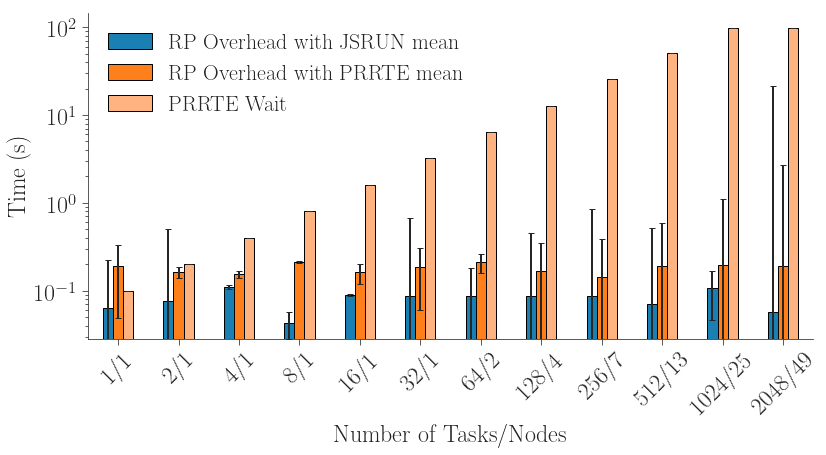

In [14]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh.plot.bar(
    x   ='nunitnode', 
    y   = ['RP Overhead with JSRUN mean','RP Overhead with PRRTE mean','PRRTE Wait'], 
    yerr= [oh['RP Overhead with JSRUN std'],oh['RP Overhead with PRRTE std'],oh['PRRTE Overhead std']*0],
    logy=True,
    width=0.5, color=[tableau20[0], tableau20[2],tableau20[3]], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_rp_overhead.png')

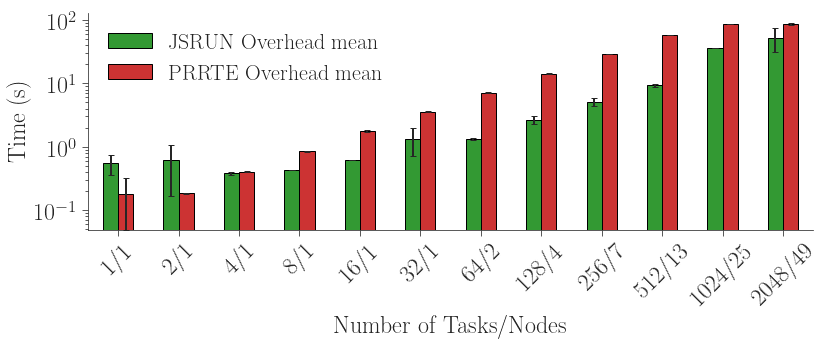

In [15]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh.plot.bar(
    x='nunitnode', 
    y=['JSRUN Overhead mean','PRRTE Overhead mean'], 
    yerr=[oh['JSRUN Overhead std'],oh['PRRTE Overhead std']],
    logy=True,
    width=0.5, color=[tableau20[4],tableau20[6]], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_jsrun_prrte_stress_weak_scaling_jsrun_prrte_overhead.png')

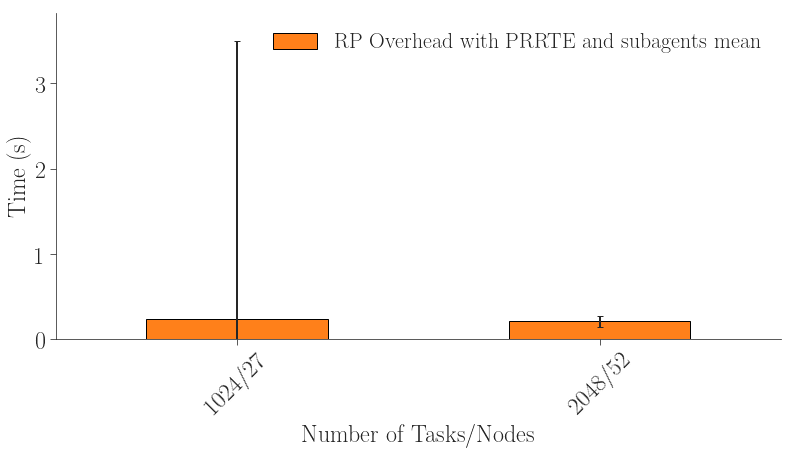

In [16]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh3.plot.bar(
    x   ='nunitnode', 
    y   = 'RP Overhead with PRRTE and subagents mean', 
    yerr= 'RP Overhead with PRRTE and subagents std',
    #logy=True,
    width=0.5, color=tableau20[2], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_multiagent.png')

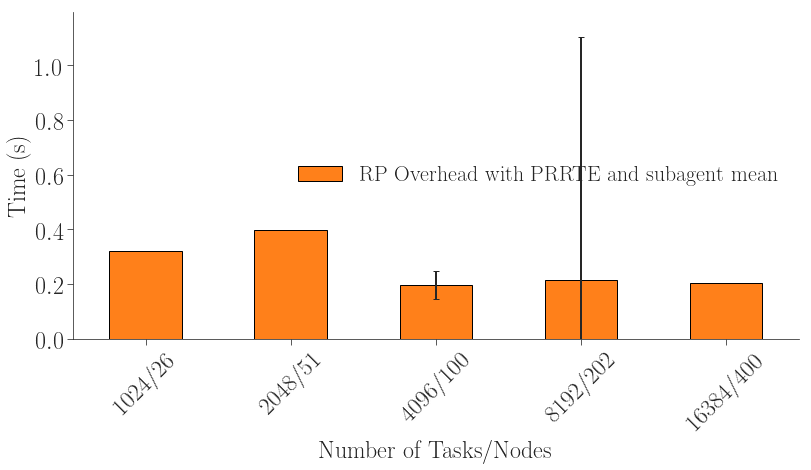

In [17]:
fig, ax = fig_setup(figsize=(13,6))

# oh = oh.fillna(0)

oh4.plot.bar(
    x   ='nunitnode', 
    y   = 'RP Overhead with PRRTE and subagent mean', 
    yerr= 'RP Overhead with PRRTE and subagent std',
    # logy=True,
    width=0.5, color=tableau20[2], ax=ax, rot=45)

ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')
ax.set_ylim(0)
# ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_subagent.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_rp_overhead_subagent.png')

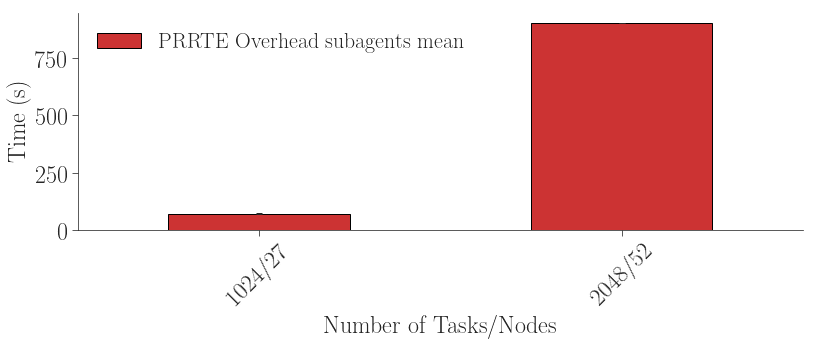

In [18]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh3.plot.bar(
    x='nunitnode', 
    y='PRRTE Overhead subagents mean', 
    yerr='PRRTE Overhead subagents std',
    #logy=True,
    width=0.5, color=tableau20[6], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_multiagent_overhead.png')

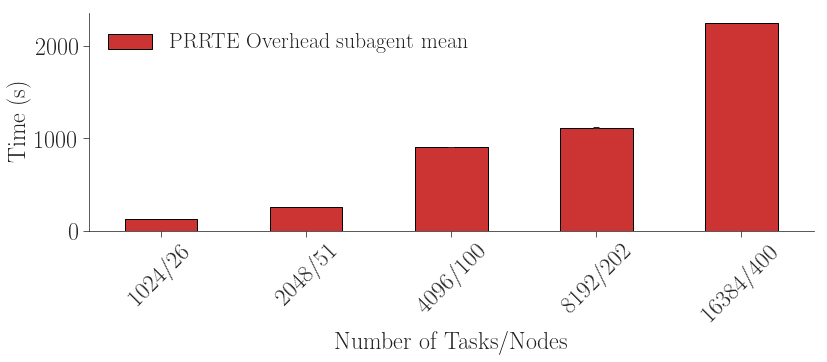

In [19]:
fig, ax = fig_setup(figsize=(13,4))

# Plot means and std bars

oh4.plot.bar(
    x='nunitnode', 
    y='PRRTE Overhead subagent mean', 
    yerr='PRRTE Overhead subagent std',
#     logy=True,
    width=0.5, color=tableau20[6], ax=ax, rot=45) 


ax.set_xlabel('Number of Tasks/Nodes')
ax.set_ylabel('Time (s)')

ax.set_ylim(0)
ax.set_xlim(-0.5)

plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_subagent_overhead.pdf', dpi=300, bbox_inches='tight')
plt.savefig('figures/paper_prrte_stress_weak_scaling_prrte_subagent_overhead.png')

In [20]:
# cu_exec_start
# cu_exec_stop